In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import glob
import re
import platform
import importlib
import netCDF4
import multiprocessing as mp
import itertools

user_name = input("Your home folder's user name?")

if platform.system() == 'Darwin':  # macOS
    base_FP = f'/Users/{user_name}/data'
    cpuserver_data_FP = f'/Users/{user_name}/cpuserver_data'
elif platform.system() == 'Linux':
    base_FP = f'/home/{user_name}/data'
    cpuserver_data_FP = f'/home/{user_name}/cpuserver_data'
else:
    base_FP = '/data'
    cpuserver_data_FP = '/data'
print(base_FP, cpuserver_data_FP)
sys.path.append(base_FP + '/python_modules')

#hydroAI libs
import HydroAI.HLS as hHLS
import HydroAI.Plot as hPlot
import HydroAI.Data as hData
import HydroAI.Grid as hGrid
importlib.reload(hHLS);
importlib.reload(hPlot);
importlib.reload(hData);
importlib.reload(hGrid);

Your home folder's user name? subin


/home/subin/data /home/subin/cpuserver_data


In [8]:
def average_3d_into_1d(data, axis_arg=(0,1)):
    data = np.nanmean(data, axis=axis_arg)
    return data

year_list = range(2013, 2024 + 1)

for i, year in enumerate(year_list):
    nc_file_name = f'{cpuserver_data_FP}/HLS/Korea/UHI_project_L30/HLS_{year}_GJ.nc' 
    nc_data   = netCDF4.Dataset(nc_file_name)
    dates_int = nc_data.variables['dates'][:].data
    tir1    = nc_data.variables['tir1'][:].data
    red     = nc_data.variables['red'][:].data
    nir     = nc_data.variables['nir'][:].data
    swir1   = nc_data.variables['swir1'][:].data
    nc_data.close()

    tir1 = average_3d_into_1d(tir1)
    red = average_3d_into_1d(red)
    nir = average_3d_into_1d(nir)
    swir1 = average_3d_into_1d(swir1)
    
    if i != 0:
        dates_int = np.append(dates_int_old, dates_int)
        tir1 = np.append(tir1_old, tir1)
        red = np.append(red_old, red)
        nir = np.append(nir_old, nir)
        swir1 = np.append(swir1_old, swir1)

    dates_int_old = dates_int
    tir1_old = tir1
    red_old = red
    nir_old = nir
    swir1_old = swir1

/tmp/ipykernel_2370079/1502844420.py:2: RuntimeWarning: Mean of empty slice
  data = np.nanmean(data, axis=axis_arg)


In [9]:
np.shape(tir1)

(927,)

In [11]:
print(dates_int[:5])
dates = [f"{str(x)[:4]}.{str(x)[4:6]}.{str(x)[6:]}" for x in dates_int]
print(dates[:5])

[20130411 20130425 20130427 20130511 20130513]
['2013.04.11', '2013.04.25', '2013.04.27', '2013.05.11', '2013.05.13']


In [24]:
np.save(f'{cpuserver_data_FP}/HLS/Korea/UHI_project_L30/dates_GJ.npy', dates_int)
np.save(f'{cpuserver_data_FP}/HLS/Korea/UHI_project_L30/tir1_GJ.npy', tir1)
np.save(f'{cpuserver_data_FP}/HLS/Korea/UHI_project_L30/red_GJ.npy', red)
np.save(f'{cpuserver_data_FP}/HLS/Korea/UHI_project_L30/nir_GJ.npy', nir)
np.save(f'{cpuserver_data_FP}/HLS/Korea/UHI_project_L30/swir1_GJ.npy', swir1)

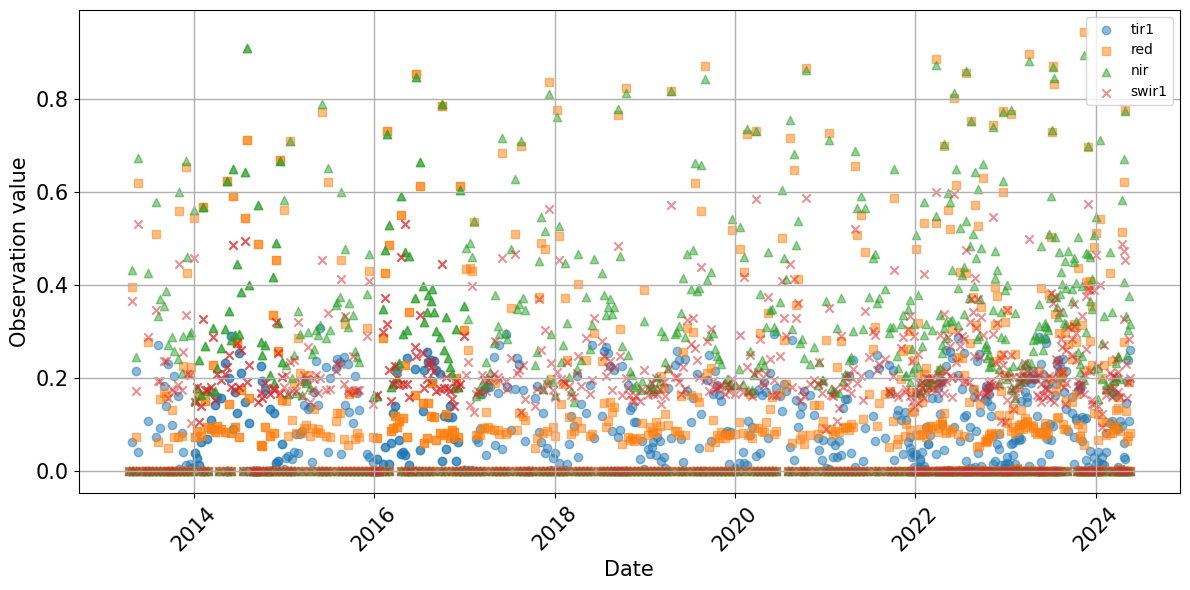

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert date strings to datetime objects
dates = pd.to_datetime(dates, format='%Y.%m.%d')

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(dates, tir1, marker='o', linestyle='-', alpha=0.5, label='tir1')
plt.scatter(dates, red, marker='s', linestyle='-', alpha=0.5, label='red')
plt.scatter(dates, nir, marker='^', linestyle='-', alpha=0.5, label='nir')
plt.scatter(dates, swir1, marker='x', linestyle='-', alpha=0.5, label='swir1')

plt.xlabel('Date')
plt.ylabel('Observation value')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()